<a href="https://colab.research.google.com/github/BrahmaTeja7/Dissertation_Research_Code/blob/main/Exploratory_Data_Analysis_for_Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries for finding the accuracy of the selected Machine learning models in predicting the fake news.**

In [ ]:
#Libraries for data manipulation
import numpy as np
import pandas as pd

#Libraries for text modification and preprocessing
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Libraries for Natural Language Processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Loading the Dataset using Pandas Library**

In [ ]:
dataset = pd.read_csv('/content/Fake&True_News.csv')

# **Preliminary Checks**

In [ ]:
dataset.shape

(44867, 5)

### **Creating a new column "label" to convert the values of True or False to 0 & 1.**

In [ ]:
dataset['label'] = np.where(dataset['marker'] == True, 0, 1)
print(dataset)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44862  'Fully committed' NATO backs new U.S. approach...   
44863  LexisNexis withdrew two products from Chinese ...   
44864  Minsk cultural hub becomes haven from authorities   
44865  Vatican upbeat on possibility of Pope Francis ...   
44866  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn't wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

## **Distribution of Fake and True Classes in a dataset**

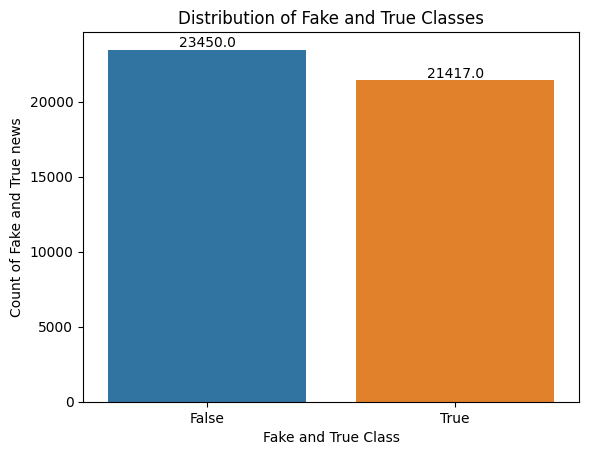

In [ ]:
# Assuming y_true is your true labels
y_true = dataset.marker.values

# Count the occurrences of each class
class_counts = sns.countplot(x=y_true)

# Adding labels and title
class_counts.set(xlabel='Fake and True Class', ylabel='Count of Fake and True news', title='Distribution of Fake and True Classes')

# Display the count above each bar
for p in class_counts.patches:
    class_counts.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


## **Text Pre-processing Steps**

**Converting the text to lowercase**

In [ ]:
dataset['processing_text'] = dataset['text'].str.lower()
print(dataset)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44862  'Fully committed' NATO backs new U.S. approach...   
44863  LexisNexis withdrew two products from Chinese ...   
44864  Minsk cultural hub becomes haven from authorities   
44865  Vatican upbeat on possibility of Pope Francis ...   
44866  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn't wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

**Removing the Punctuations in the text**

In [ ]:
def removing_punctuations(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [ ]:
dataset['processing_text'] = dataset['processing_text'].apply(lambda x: removing_punctuations(x))
print(dataset)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44862  'Fully committed' NATO backs new U.S. approach...   
44863  LexisNexis withdrew two products from Chinese ...   
44864  Minsk cultural hub becomes haven from authorities   
44865  Vatican upbeat on possibility of Pope Francis ...   
44866  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn't wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

**Removing the stopwords in text column**

In [ ]:
Stopword = set(stopwords.words('english'))
def removing_stopwords(text):
  return " ".join([word for word in text.split() if word not in Stopword])

In [ ]:
dataset['processing_text'] = dataset['processing_text'].apply(lambda x: removing_stopwords(x))
print(dataset)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44862  'Fully committed' NATO backs new U.S. approach...   
44863  LexisNexis withdrew two products from Chinese ...   
44864  Minsk cultural hub becomes haven from authorities   
44865  Vatican upbeat on possibility of Pope Francis ...   
44866  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn't wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

**Removing the special Characters, Html tags, Url in text column**

In [ ]:
def remove_chars_url_htmlTags(text):
  text = re.sub('[^a-zA-Z0-9]', ' ',text)
  text = re.sub('\s+', ' ',text)
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  text = re.sub(r'<.*?>','',text)
  return text

In [ ]:
dataset['processing_text'] = dataset['processing_text'].apply(lambda x: remove_chars_url_htmlTags(x))
dataset.head()

,title,text,subject,date,marker,label,processing_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn't wish all Americans ...,News,31-Dec-17,False,1,donald trump couldnt wish americans happy new ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,False,1,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,False,1,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,False,1,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,False,1,pope francis used annual christmas day message...


**Initializing Porter Stemmer function and applying stemming to reduce the text to their root word**

In [ ]:
port_stemming = PorterStemmer()

In [ ]:
def stemming(text):
  return " ".join([port_stemming.stem(word) for word in text.split()])

In [ ]:
dataset['stemmed_text'] = dataset['processing_text'].apply(lambda x: stemming(x))
dataset.head()

,title,text,subject,date,marker,label,processing_text,stemmed_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn't wish all Americans ...,News,31-Dec-17,False,1,donald trump couldnt wish americans happy new ...,donald trump couldnt wish american happi new y...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,False,1,house intelligence committee chairman devin nu...,hous intellig committe chairman devin nune go ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,False,1,friday revealed former milwaukee sheriff david...,friday reveal former milwauke sheriff david cl...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,False,1,christmas day donald trump announced would bac...,christma day donald trump announc would back w...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,False,1,pope francis used annual christmas day message...,pope franci use annual christma day messag reb...


**Tokenizing the words in the text column**

In [ ]:
def token(text):
  return word_tokenize(text)

In [ ]:
dataset['stemmed_text'] = dataset['stemmed_text'].apply(lambda x: token(x))
print(dataset)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44862  'Fully committed' NATO backs new U.S. approach...   
44863  LexisNexis withdrew two products from Chinese ...   
44864  Minsk cultural hub becomes haven from authorities   
44865  Vatican upbeat on possibility of Pope Francis ...   
44866  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn't wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

## **Word Cloud using Tf-Idf vectorizer**

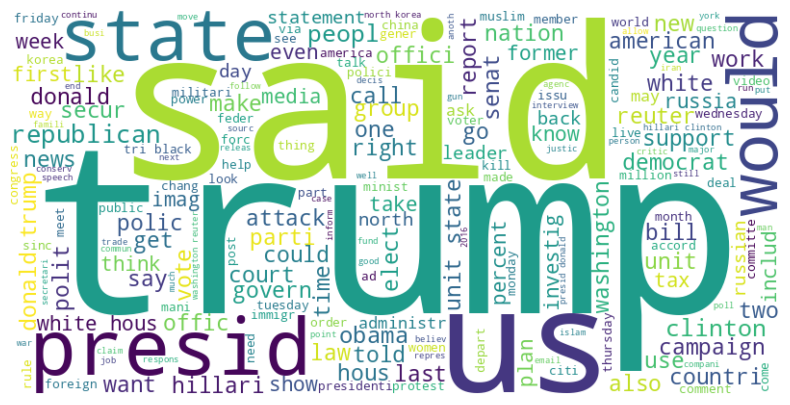

In [ ]:
dataset['stemmed_text'] = dataset['stemmed_text'].apply(lambda x: ' '.join(x))

#Initialize tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['stemmed_text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_values = tfidf_matrix.sum(axis=0).A1

# Creating a dictionary with word frequencies
word_frequencies = dict(zip(feature_names, tfidf_values))

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Displaying the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Number of Fake News categorized by Subject**

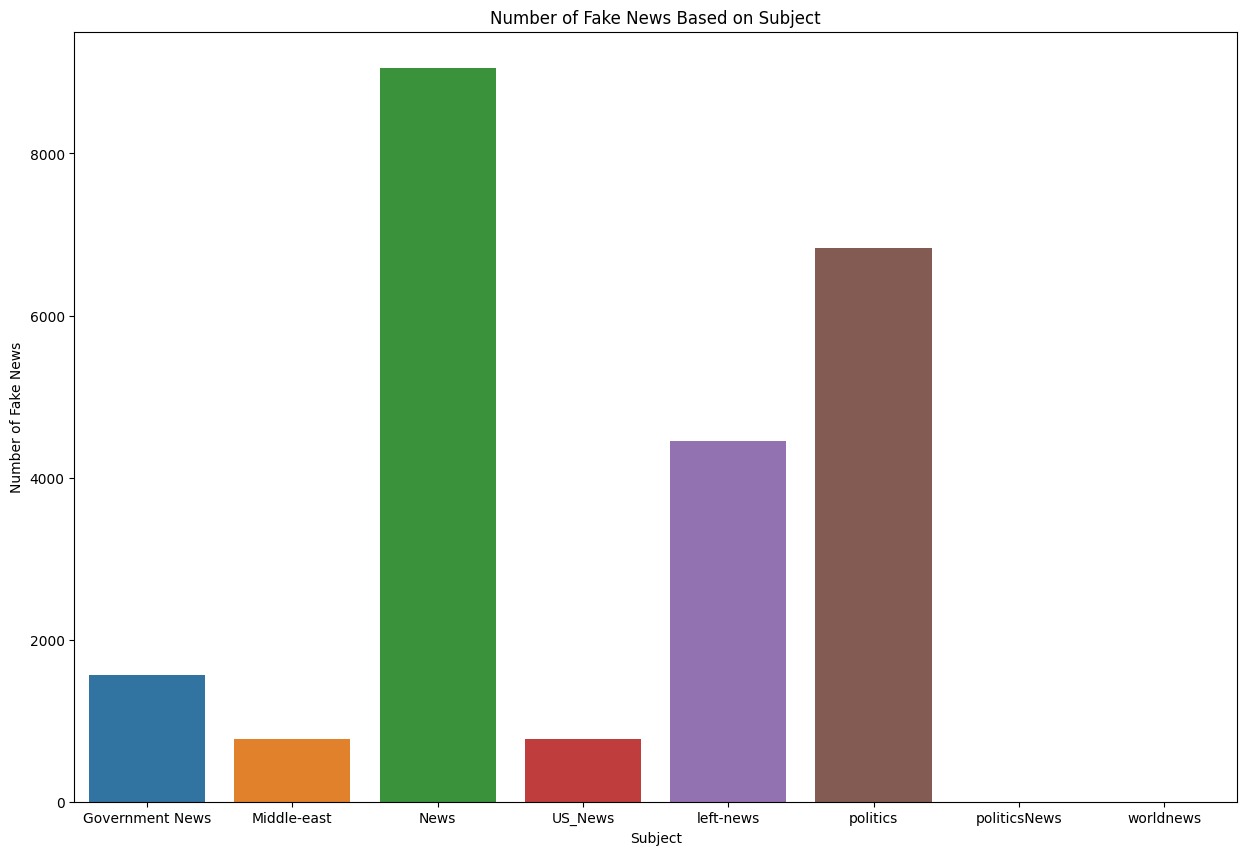

In [ ]:


# Counting the occurrences of fake and not fake news based on the subject
fake_news_counts = dataset.groupby('subject')['label'].sum().reset_index()

# Creating a bar plot to visualize the number of fake news based on subject
plt.figure(figsize=(15, 10))
sns.barplot(x='subject', y='label', data=fake_news_counts)
plt.title("Number of Fake News Based on Subject")
plt.xlabel("Subject")
plt.ylabel("Number of Fake News")
plt.show()


## **Number of True News categorized by Subject**

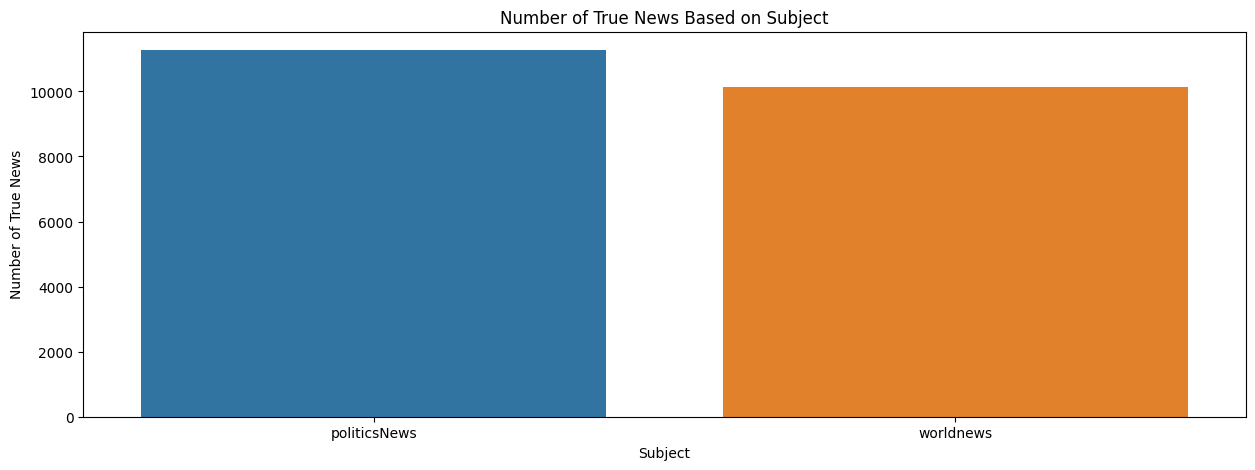

In [ ]:
# Filtering the DataFrame to include only true news (label = 0)
true_news_df = dataset[dataset['label'] == 0]

# Counting the occurrences of true news based on the subject
true_news_counts = true_news_df.groupby('subject').size().reset_index(name='count')

# Creating a bar plot to visualize true news based on subject
plt.figure(figsize=(15, 5))
sns.barplot(x='subject', y='count', data=true_news_counts)
plt.title("Number of True News Based on Subject")
plt.xlabel("Subject")
plt.ylabel("Number of True News")
plt.show()


## **Word Cloud using Bag of Words vectorizer**

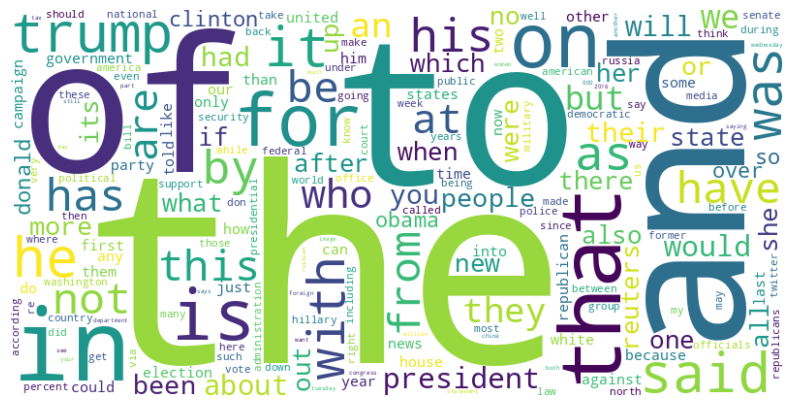

In [ ]:
# Creating a bag of words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['text'])

# Getting  feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum up the word frequencies
word_frequencies = X.sum(axis=0).tolist()[0]

# Creating a dictionary with word frequencies
word_freq_dict = dict(zip(feature_names, word_frequencies))

# Generating WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plotting wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
